In [1]:
# Instalar la biblioteca zbar y sus dependencias
# Install the zbar library and its dependencies
!apt-get install -y libzbar0

# Instalar las bibliotecas de Python necesarias
# Install necessary Python libraries
!pip install pillow matplotlib pyzbar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

In [2]:
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode
import os

In [3]:
# Montar Google Drive
# Mount Google Drive
drive.mount('/content/drive')

# Establecer la ruta a la carpeta que contiene las imágenes
# Set the path to the folder containing the images
ruta_carpeta = '/content/drive/My Drive/Actas'  # Reemplazar con tu ruta de carpeta

Mounted at /content/drive


In [4]:
# Función para decodificar el código QR de una imagen
# Function to decode QR code from an image
def decodificar_qr(imagen_ruta):
    imagen = Image.open(imagen_ruta)
    objetos_decodificados = decode(imagen)
    lista_textos = [obj.data.decode('utf-8') for obj in objetos_decodificados]
    return lista_textos

# Función para procesar las líneas de lista_textos_qr
# Function to process lines from lista_textos_qr
def procesar_lineas(lista_textos_qr):
    resultados = []

    for cadena_entrada in lista_textos_qr:
        partes = cadena_entrada.split('!')
        primer_termino = partes[0].split('.')[0]
        parte_numeros = partes[1]
        cadenas_numeros = parte_numeros.split(',')
        numeros = [int(num) for num in cadenas_numeros]
        rangos = [
            (0, 13),
            (13, 19),
            (19, 20),
            (20, 24),
            (24, 30),
            (30, 31),
            (31, 33),
            (33, 36),
            (36, 37),
            (37, 38)
        ]
        sumas = [sum(numeros[start:end]) for start, end in rangos]
        resultado = [primer_termino] + sumas
        resultados.append(resultado)

    return resultados

# Lista para almacenar el texto de los códigos QR
# List to store QR codes' text
lista_textos_qr = []

# Iterar a través de todos los archivos en la carpeta especificada
# Iterate through all files in the specified folder
for nombre_archivo in os.listdir(ruta_carpeta):
    ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)
    if ruta_archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        textos = decodificar_qr(ruta_archivo)
        lista_textos_qr.extend(textos)

# Procesar los textos de QR recopilados
# Process the collected QR texts
resultados_procesados = procesar_lineas(lista_textos_qr)

# Nombres de candidatos y colores
# Candidate names and colors
candidatos = [
    'Maduro', 'Martinez', 'Bertucci', 'Brito', 'Ecarri',
    'Fermin', 'Ceballos', 'Gonzalez', 'Marquez', 'Rausseo'
]
colores = [
    'red', 'gray', 'green', 'yellow', 'purple',
    'skyblue', 'orange', 'blue', 'pink', 'black'
]

# Inicializar una lista para almacenar los votos totales para cada candidato
# Initialize a list to store total votes for each candidate
votos_totales = [0] * len(candidatos)

# Sumar votos para cada candidato
# Sum votes for each candidate
for entrada in resultados_procesados:
    votos = entrada[1:]
    for i in range(len(votos)):
        votos_totales[i] += votos[i]

# Imprimir votos totales para cada candidato
# Print total votes for each candidate
for i, total in enumerate(votos_totales):
    print(f"{candidatos[i]}: {total} votos")

Maduro: 420 votos
Martinez: 10 votos
Bertucci: 4 votos
Brito: 1 votos
Ecarri: 5 votos
Fermin: 2 votos
Ceballos: 2 votos
Gonzalez: 673 votos
Marquez: 2 votos
Rausseo: 11 votos


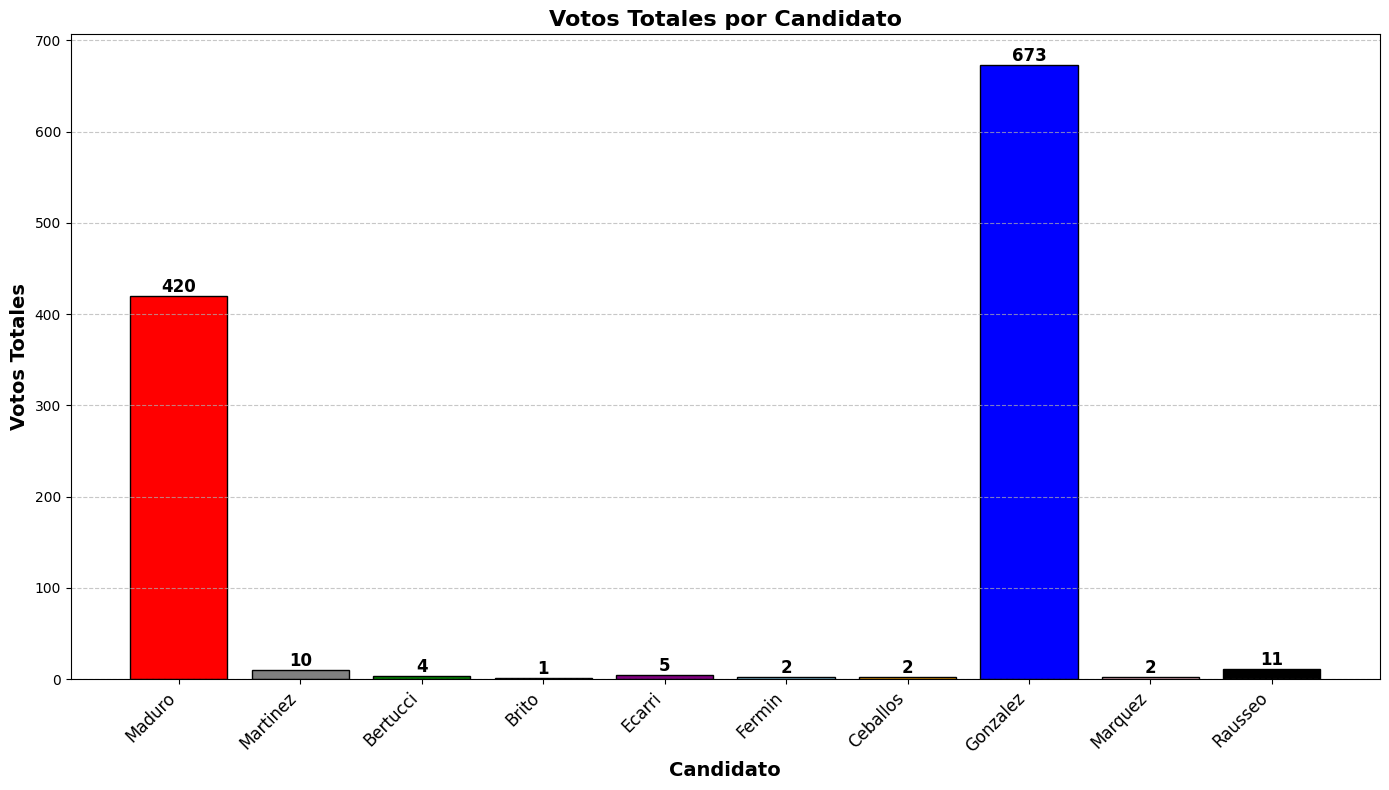

In [5]:
# Graficar los resultados
# Plot the results
plt.figure(figsize=(14, 8))
barras = plt.bar(candidatos, votos_totales, color=colores, edgecolor='black')

# Añadir etiquetas y título con estilo personalizado
# Add labels and title with custom styling
plt.xlabel('Candidato', fontsize=14, fontweight='bold')
plt.ylabel('Votos Totales', fontsize=14, fontweight='bold')
plt.title('Votos Totales por Candidato', fontsize=16, fontweight='bold')

# Añadir etiquetas de valor en las barras
# Add value labels on bars
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2.0,
        altura,
        f'{altura}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

# Rotar las etiquetas del eje x para una mejor legibilidad
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Añadir una cuadrícula para el eje y y mejorar el diseño
# Add grid for y-axis and improve layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
# Show plot
plt.show()